A portable Near Infra Red (NIR) spectometer was explored in this study to probe lab formulated Isoniazid (IS) as well as Doxycycline (DE) samples housed in broad spectrum of coated capsules including capsules made from vegetable cellulose and gelatin. The capsules are of varying opacity which introduce variations similar to real life scenerios associated different capssule coatings by manufacturers.

Mixture of isoniazid and alpha crystalline cellulose were formulated in the lab with active pharmaceuticals ingredients (API)- isoniazid content (w/w) used in the regression studies. We used this as hypothetical study as most isoniazid exist in tablet forms rather than in capsules. A real life case study used doxycyline as doxycyline exist in capsules.

Binary mixture of doxycyline hydrate (ALFA AESAR) and alpha-lactose (Sigma) were formulated in the lab with active pharmaceuticals ingredients (API)- doxycyline hydrate- content used in the regression studies. 

See the supplementary information of our work titled "Minimizing Pill Coatings interference in detection of Fake Pharmaceuticals through Data Pre-treatment" for the lab based formulations used in this work

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA as sk_pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from pyopls import OPLS
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import r2_score, accuracy_score

ISONIAZID LAB FORMULATION WITH CRYSTALLINE CELLULOSE

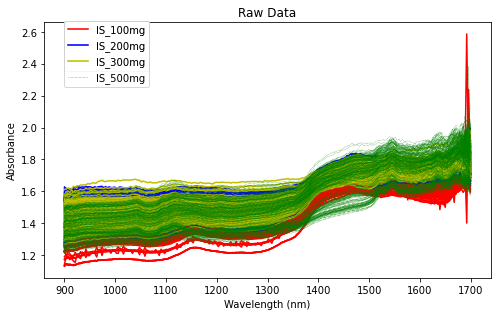

In [2]:
#Lab Formulated Isonized (IS) were housed in broad range of capsules and probed with NIR spectrometer for regression studies

#Visual inspection of line plot of the raw date from lab formulated Isoniazid in varying capsules when introduced to NIR spectrometer

spectra_1 = pd.read_csv(r'ISCE_data_mg.csv')
target = pd.read_csv(r'isce_conc.csv')

wv = np.arange(900,1700,3.52) #the wavelength range used for this study

spectra_2 = pd.DataFrame(spectra_1)
spectra_3 = spectra_2.values[0:,0:]
spectra_T_n = spectra_3.T

IS_100mg_RAW =spectra_T_n[:,0:300]
IS_200mg_RAW =spectra_T_n[:,301:524]
IS_300mg_RAW =spectra_T_n[:,525:776]
IS_500mg_RAW =spectra_T_n[:,777:1031]


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, IS_100mg_RAW, label='IS_100mg',color='r');
ax.plot(wv, IS_200mg_RAW, label='IS_200mg',color='b');
ax.plot(wv, IS_300mg_RAW, label='IS_300mg',color='y');
ax.plot(wv, IS_500mg_RAW, label='IS_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Raw Data")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");


Predictive Models(support vector machine regression (SVM-R) & partial Least square regression(PLS-R)) for the raw dataset

In [3]:
#Split the dataset (SNV) to train and test sets

X_n= pd.DataFrame(StandardScaler().fit_transform(spectra_T_n))

x_n = X_n.T
y_n = pd.DataFrame(target)
x_train_a,x_test_a,y_train_a,y_test_a = train_test_split(x_n,y_n,random_state=0,test_size=0.3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Predicted (mg)')

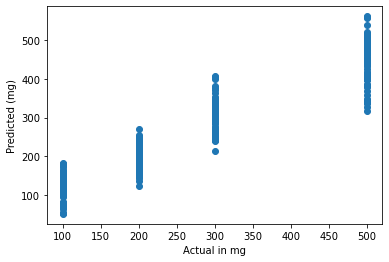

In [4]:
#the raw dataset to train and test sets
#support vector machine (SVM) regression 

#SVM_regression - can be optimised
#Train SVM model

regr_n = svm.SVR(kernel='poly',gamma = 0.02, C = 1)
regr_n.fit(x_train_a, y_train_a)

#Test the model

clf_1svr_a = regr_n.predict(x_test_a)

#plot the predicted against actual

plt.scatter(y_test_a,clf_1svr_a)

plt.xlabel("Actual in mg")
plt.ylabel("Predicted (mg)")

In [5]:
#determine the correlation co-efficient (R squared) for SVM-R
q_squared_a1 = r2_score(y_test_a, clf_1svr_a) 
q_squared_a1

0.877922236689431

In [6]:
#determine the root mean sqare error for SVM-R

mean_squared_error(y_test_a, clf_1svr_a,squared=False)

52.2850733315104

In [7]:
#the dataset (OSC) to train and test sets
#OPLS of the raw data

spectra = pd.read_csv(r'ISCE_data_mg.csv')
target = pd.read_csv(r'isce_conc.csv')



opls = OPLS(39)
Z = opls.fit_transform(spectra, target)

pls = PLSRegression(1)

#OPLS for Raw Data
y_preda_raw = cross_val_predict(pls, spectra, target, cv=LeaveOneOut())
q_squared = r2_score(target, y_preda_raw)  
 

In [8]:
#determinr the correlation co-efficient(R-squared) for raw spectra
q_squared = r2_score(target, y_preda_raw)
q_squared

0.6454037067588276

In [9]:
#determine the root mean sqare error for raw spectra

mean_squared_error(target, y_preda_raw,squared=False)

89.8712729356915

Data Pretreatment of the Raw Data

Standard Normal Variate (SNV) folloewed by Savitzki-Golay(SG) Data Pretreatment tranformations of the raw spectra

In [10]:
def snv(x):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(x)
    for i in range(x.shape[0]):
 
        # Apply correction
        output_data[i,:] = (x[i,:] - np.mean(x[i,:])) / np.std(x[i,:])
 
    return output_data

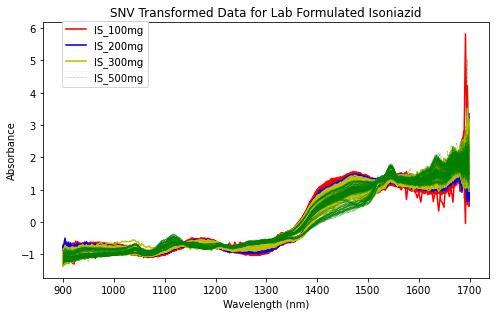

In [11]:
#Visual inspection of line plot of the SNV traeted data from lab formulated Isoniazid in capsules of varying colors and opacities when introduced to NIR spectrometer

#SNV transformation of the raw data

data_isce = pd.read_csv(r'ISCE_data_mg.csv')
x_isce= data_isce.values[:,:]
spectra_snv = snv(x_isce)

spectra_snv_d = pd.DataFrame(spectra_snv)
spectra_snv_ = spectra_snv_d.values[0:,0:]
spectra_T = spectra_snv_.T

#Line plot 

IS_100mg_SNV =spectra_T[:,0:300]
IS_200mg_SNV =spectra_T[:,301:524]
IS_300mg_SNV =spectra_T[:,525:776]
IS_500mg_SNV =spectra_T[:,777:1031]

    
    
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, IS_100mg_SNV, label='IS_100mg',color='r');
ax.plot(wv, IS_200mg_SNV, label='IS_200mg',color='b');
ax.plot(wv, IS_300mg_SNV, label='IS_300mg',color='y');
ax.plot(wv, IS_500mg_SNV, label='IS_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data for Lab Formulated Isoniazid")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

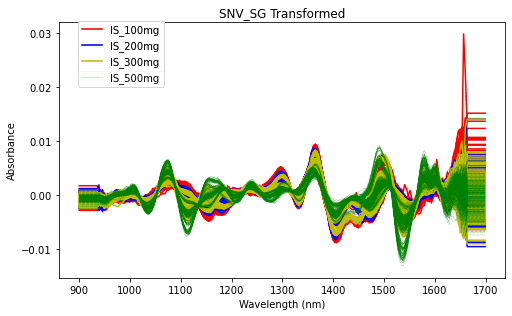

In [12]:
#Visual inspection of line plot of the SNV+SG traeted data from lab formulated Isoniazid in varying capsules when introduced to NIR spectrometer

#SG transformation of the SNV transformed data

Xsnv_sg_ = savgol_filter(spectra_snv, 21, polyorder = 2, deriv=2)

spectra_sg = pd.DataFrame(Xsnv_sg_)
spectra_snvsg = spectra_sg.values[0:,0:]
spectra_T_ = spectra_snvsg.T


#Line plot

IS_100mg_SNVSG =spectra_T_[:,0:300]
IS_200mg_SNVSG =spectra_T_[:,301:524]
IS_300mg_SNVSG =spectra_T_[:,525:776]
IS_500mg_SNVSG =spectra_T_[:,777:1031]


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, IS_100mg_SNVSG, label='IS_100mg',color='r');
ax.plot(wv, IS_200mg_SNVSG, label='IS_200mg',color='b');
ax.plot(wv, IS_300mg_SNVSG, label='IS_300mg',color='y');
ax.plot(wv, IS_500mg_SNVSG, label='IS_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV_SG Transformed")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

Orthogonal Scattering Correction (0SC) followed by Savitzki-Golay (SG) Data Pretreatment tranformations of the raw spectra

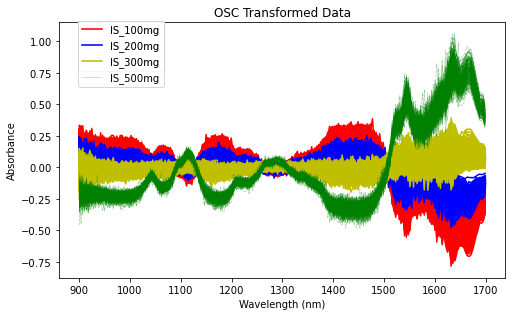

In [13]:
#Visual inspection of line plot of the Orthogonal Signal Correction(OSC) traeted data from lab formulated Isoniazid in capsules of varying colors and opacities when introduced to NIR spectrometer



spectra = pd.read_csv(r'ISCE_data_mg.csv')
target = pd.read_csv(r'isce_conc.csv')

opls = OPLS(39)
Z_osc = opls.fit_transform(spectra, target)


Z_T = Z_osc.T

IS_100mg_OSC =Z_T[:,0:300]
IS_200mg_OSC =Z_T[:,301:524]
IS_300mg_OSC =Z_T[:,525:776]
IS_500mg_OSC =Z_T[:,777:1031]


wv = np.arange(900,1700,3.52)


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, IS_100mg_OSC, label='IS_100mg',color='r');
ax.plot(wv, IS_200mg_OSC, label='IS_200mg',color='b');
ax.plot(wv, IS_300mg_OSC, label='IS_300mg',color='y');
ax.plot(wv, IS_500mg_OSC, label='IS_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("OSC Transformed Data")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

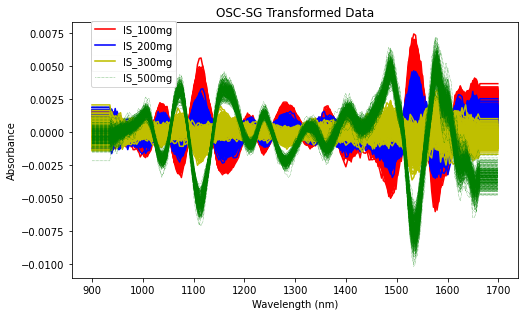

In [14]:
#Visual inspection of line plot of the OSC+SG traeted data from lab formulated Isoniazid in capsules of varying colors and opacities when introduced to NIR spectrometer

Xosc_sg = savgol_filter(Z_osc, 21, polyorder = 2, deriv=2)


Xosc_sg_T = Xosc_sg.T

IS_100mg_OSC_SG =Xosc_sg_T[:,0:300]
IS_200mg_OSC_SG =Xosc_sg_T[:,301:524]
IS_300mg_OSC_SG =Xosc_sg_T[:,525:776]
IS_500mg_OSC_SG =Xosc_sg_T[:,777:1031]


wv = np.arange(900,1700,3.52)

#plt.plot(wv,Xsnv_sg_T);


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, IS_100mg_OSC_SG, label='IS_100mg',color='r');
ax.plot(wv, IS_200mg_OSC_SG, label='IS_200mg',color='b');
ax.plot(wv, IS_300mg_OSC_SG, label='IS_300mg',color='y');
ax.plot(wv, IS_500mg_OSC_SG, label='IS_500mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("OSC-SG Transformed Data")



 #Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

Predictive Models (support vector machine regression (SVM-R) & partial Least square regression(PLS-R)) for the SNV dataset

In [15]:
#Split the dataset (SNV) to train and test sets

X_snv_isce= pd.DataFrame(StandardScaler().fit_transform(spectra_T))

x_snv_isce = X_snv_isce.T
#x_snv_isce = spectra_T.T
y_snv_isce = pd.DataFrame(target)
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(x_snv_isce,y_snv_isce,random_state=0,test_size=0.3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Predicted (mg)')

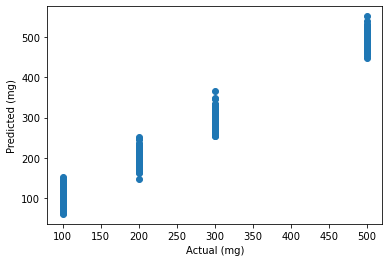

In [16]:
#the dataset (SNV) to train and test sets
#support vector machine (SVM) regression 

#SVM_regression - can be optimised
#Train SVM model

regr = svm.SVR(kernel='poly',gamma = 0.2, C = 1)
regr.fit(x_train_b, y_train_b)

#Test the model

clf_1svr_b = regr.predict(x_test_b)


#plot the predicted against actual

plt.scatter(y_test_b,clf_1svr_b)

plt.xlabel("Actual (mg)")
plt.ylabel("Predicted (mg)")

In [17]:
#determine the correlation co-efficient (R squared) for SVM-R
q_squared_b = r2_score(y_test_b, clf_1svr_b) 
q_squared_b

0.9791339879666874

In [18]:
#determine the root mean sqare error for SVM-R

mean_squared_error(y_test_b, clf_1svr_b,squared=False)

21.61619086590866

In [19]:
from sklearn.metrics import r2_score

best_r2 = 0
best_ncmop = 0
for n_comp in range(1, 101):
    my_plsr = PLSRegression(n_components=n_comp, scale=True)
    my_plsr.fit(x_train_b, y_train_b)
    preds = my_plsr.predict(x_test_b)
    
    r2 = r2_score(preds, y_test_b)
    if r2 > best_r2:
        best_r2 = r2
        best_ncomp = n_comp

print(best_r2, best_ncomp)

0.9513348099884061 7


Text(0, 0.5, 'Predicted (mg)')

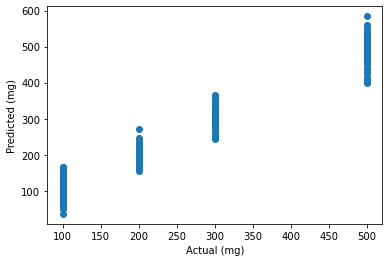

In [20]:
#the dataset (SNV) to train and test sets
#Partial Least square regression (PLS-R) 

pls_1 = PLSRegression(n_components=7)

#Train PLS-R model

pls_1.fit(x_train_b, y_train_b)

#test PLS-R model
Y_pred_b = pls_1.predict(x_test_b)

#plot the predicted against actual
plt.scatter(y_test_b,Y_pred_b)
plt.xlabel("Actual (mg)")
plt.ylabel("Predicted (mg)")

In [21]:
#determine the correlation co-efficient (R squared) 
q_squared_b = r2_score(y_test_b,Y_pred_b) 
q_squared_b

0.954393382712631

In [22]:
#determine the root mean sqare error 

mean_squared_error(y_test_b, Y_pred_b,squared=False)

31.95754213804419

Predictive Models(support vector machine (SVM) & partial Least square regression(PLS-R)) for the SNV+SG dataset

In [23]:
#Split the dataset (SNV+SG) to train and test sets

X_sgsnv_isce= pd.DataFrame(StandardScaler().fit_transform(spectra_T_))

#x_sgsnv_isce = spectra_T_.T
x_sgsnv_isce = X_sgsnv_isce.T
y_sgsnv_isce = target
x_train_c,x_test_c,y_train_c,y_test_c = train_test_split(x_sgsnv_isce,y_sgsnv_isce,random_state=0,test_size=0.3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Predicted (mg)')

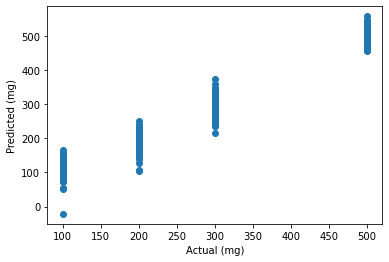

In [24]:
#the dataset (SNV+SG) to train and test sets
#support vector machine (SVM) regression 

#SVM_regression - can be optimised
#Traun SVM model

regr_c = svm.SVR(kernel='poly',gamma = 0.2, C = 1)
regr_c.fit(x_train_c, y_train_c)

#Test the model

clf_1svr_c = regr_c.predict(x_test_c)

#plot the predicted against actual

plt.scatter(y_test_c,clf_1svr_c)

plt.xlabel("Actual (mg)")
plt.ylabel("Predicted (mg)")

In [25]:
#determine the correlation co-efficient (R squared) for SNV_SG  
q_squared = r2_score(y_test_c,clf_1svr_c) 
q_squared

0.9674542981081728

In [26]:
#determine the root mean sqare error  for SNV_SG 

mean_squared_error(y_test_c,clf_1svr_c,squared=False)

26.99642525979353

Text(0, 0.5, 'Predicted')

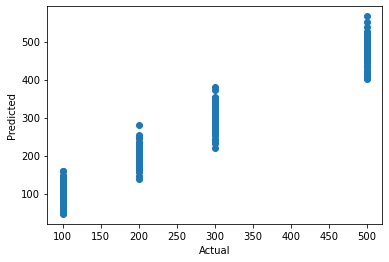

In [27]:
#the dataset (SNV+SG) to train and test sets
#Partial Least square regression (PLS-R) 

pls_1_c = PLSRegression(n_components=7)

#Train PLS-R model

pls_1_c.fit(x_train_c, y_train_c)

#test PLS-R model
Y_pred_c = pls_1_c.predict(x_test_c)

#plot the predicted against actual
plt.scatter(y_test_c,Y_pred_c)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [28]:
#determine the correlation co-efficient (R squared) 
q_squared_c = r2_score(y_test_c, Y_pred_c) 
q_squared_c

0.9515379923609377

In [29]:
#determine the root mean sqare error 

mean_squared_error(y_test_c, Y_pred_c,squared=False)

32.94277200321167

OPLS (Orthogonal projections to latent structures)

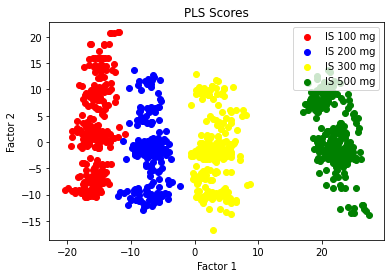

In [30]:
#the dataset (OSC) to train and test sets
spectra = pd.read_csv(r'ISCE_data_mg.csv')
target = pd.read_csv(r'isce_conc.csv')



opls = OPLS(39)
Z = opls.fit_transform(spectra, target)

pls = PLSRegression(1)

#OPLS for Raw Data
y_preda_raw = cross_val_predict(pls, spectra, target, cv=LeaveOneOut())
q_squared = r2_score(target, y_preda_raw)  
 


#OPLS for Orthoginal Scatter Corrected Data
processed_y_opls = cross_val_predict(pls, Z, target, cv=LeaveOneOut())
processed_q_squared = r2_score(target, processed_y_opls)  

r2_X = opls.score(spectra) 


plt.figure(1)
pls.fit(Z, target)
df = pd.DataFrame(np.column_stack([pls.x_scores_, opls.T_ortho_[:, 0]]),
                  index=spectra.index, columns=['t', 't_ortho'])    


pos_df = df[0:300]
neg_df = df[301:524]
neg2_df = df[525:776]
neg3_df = df[777:1031]
plt.scatter(pos_df['t'], pos_df['t_ortho'], c='red', label='IS 100 mg')
plt.scatter(neg_df['t'], neg_df['t_ortho'], c='blue', label='IS 200 mg')
plt.scatter(neg2_df['t'], neg2_df['t_ortho'], c='yellow', label='IS 300 mg')
plt.scatter(neg3_df['t'], neg3_df['t_ortho'], c='green', label='IS 500 mg')
plt.title('PLS Scores')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(loc='upper right')
plt.show()

In [31]:
#determine the correlation co-efficient(R-squared) for raw spectra
q_squared = r2_score(target, y_preda_raw)
q_squared

0.6454037067588276

In [32]:
#determine the correlation co-efficient(R-squared) for OSC transformed spectra
rocessed_q_squared = r2_score(target, processed_y_opls)
rocessed_q_squared 

0.9840622184442579

In [33]:
#determine the root mean sqare error for raw spectra

mean_squared_error(target, y_preda_raw,squared=False)

89.8712729356915

In [34]:
#determine the root mean sqare error for OSC transformed spectra

mean_squared_error(target, processed_y_opls,squared=False)

19.053191496120476

DOXYCYCLINE LAB FORMULATION WITH CRYSTALLINE CELLULOSE

In [35]:
#Import the raw lab formulated Doxycycline

In [36]:
#Import the raw lab formulated Doxycycline
data_dece = pd.read_csv(r'DE_Studies_.csv')
x_dece= data_dece.values[:,3:]



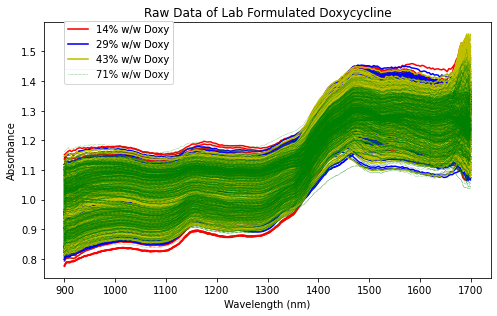

In [37]:
#Visual inspection of line plot of the raw date from lab formulated Doxycycline in capsules of varying opacities and colors when introduced to NIR spectrometer


spectra_dece = pd.read_csv(r'DE_Studies_mg_.csv')
target_dece = pd.read_csv(r'DE_Studies_conc_percent.csv')
wv = np.arange(900,1700,3.52)

spectra_dece = pd.DataFrame(spectra_dece)
spectra_dece = spectra_dece.values[0:,0:]
spectra_dece_T = spectra_dece.T

DE_100mg_RAW =spectra_dece_T[:,0:492]
DE_200mg_RAW =spectra_dece_T[:,493:1000]
DE_300mg_RAW =spectra_dece_T[:,1001:1495]
DE_500mg_RAW =spectra_dece_T[:,1496:2002]


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, DE_100mg_RAW, label='14% w/w Doxy',color='r');
ax.plot(wv, DE_200mg_RAW, label='29% w/w Doxy',color='b');
ax.plot(wv, DE_300mg_RAW, label='43% w/w Doxy',color='y');
ax.plot(wv, DE_500mg_RAW, label='71% w/w Doxy',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Raw Data of Lab Formulated Doxycycline")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

Predictive Models(support vector machine regression (SVM-R) & partial Least square regression(PLS-R)) for the raw dataset

In [38]:
#Split the raw dataset to train and test sets

X_dece_n= pd.DataFrame(StandardScaler().fit_transform(spectra_dece_T))

x_dece_n = X_dece_n.T

y_dece_n = pd.DataFrame(target_dece)
x_train_dece_a,x_test_dece_a,y_train_dece_a,y_test_dece_a = train_test_split(x_dece_n,y_dece_n,random_state=0,test_size=0.3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Predicted')

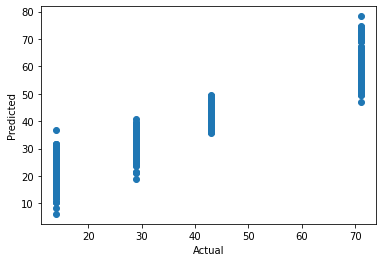

In [39]:
#the raw dataset splitted to train and test sets
#support vector machine (SVM) regression 

#SVM_regression - can be optimised by playing with the model parameters
#Train SVM model

regr_dece_n = svm.SVR(kernel='poly',gamma = 0.02, C = 1)
regr_dece_n.fit(x_train_dece_a, y_train_dece_a)

#Test the model

clf_1svr_dece_a = regr_dece_n.predict(x_test_dece_a)


#plot the predicted against actual

plt.scatter(y_test_dece_a,clf_1svr_dece_a)

plt.xlabel("Actual")
plt.ylabel("Predicted")

In [40]:
#determine the correlation co-efficient(R-squared) for raw spectra
q_squared_234 = r2_score(y_test_dece_a,clf_1svr_dece_a)
q_squared_234

0.8628467181737514

In [41]:
#determine the root mean sqare error 

mean_squared_error(y_test_dece_a,clf_1svr_dece_a,squared=False)

7.782669112479446

In [42]:
#the dataset (OSC) to train and test sets
#OPLS for Raw Data
spectra_dece = pd.read_csv(r'DE_Studies_mg_.csv')
target_dece = pd.read_csv(r'DE_Studies_conc_percent.csv')



opls = OPLS(39)
Z_dece = opls.fit_transform(spectra_dece, target_dece)

pls_dece = PLSRegression(1)

#OPLS for Raw Data
y_preda_dece_raw = cross_val_predict(pls_dece, spectra_dece, target_dece, cv=LeaveOneOut())
q_squared = r2_score(target_dece, y_preda_dece_raw)  

In [43]:
 #determinr the correlation co-efficient(R-squared) for raw spectra
q_squared_234 = r2_score(target_dece, y_preda_dece_raw)
q_squared_234

0.04447215713732944

In [44]:
#determine the root mean square error for the raw spectra

mean_squared_error(target_dece, y_preda_dece_raw,squared=False)

20.546444151201715

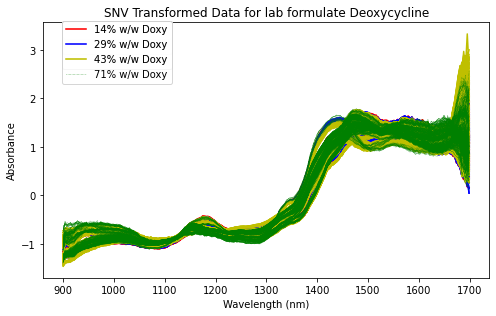

In [45]:
#Visual inspection of line plot of the SNV traeted data from lab formulated Doxycycline in capsules of varying opacities and colors when introduced to NIR spectrometer


data_dece_snv = pd.read_csv(r'DE_Studies_mg_.csv')
x_dece_snv= data_dece_snv.values[:,:]
spectra_dece_snv = snv(x_dece_snv)

spectra_dece_snv = pd.DataFrame(spectra_dece_snv)
spectra_dece_snv = spectra_dece_snv.values[0:,0:]
spectra_dece_snv_T = spectra_dece_snv.T


DE_100mg_SNV =spectra_dece_snv_T[:,0:492]
DE_200mg_SNV =spectra_dece_snv_T[:,493:1000]
DE_300mg_SNV =spectra_dece_snv_T[:,1001:1495]
DE_500mg_SNV =spectra_dece_snv_T[:,1496:2002]


    
    
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, DE_100mg_SNV, label='14% w/w Doxy',color='r');
ax.plot(wv, DE_200mg_SNV, label='29% w/w Doxy',color='b');
ax.plot(wv, DE_300mg_SNV, label='43% w/w Doxy',color='y');
ax.plot(wv, DE_500mg_SNV, label='71% w/w Doxy',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data for lab formulate Deoxycycline")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

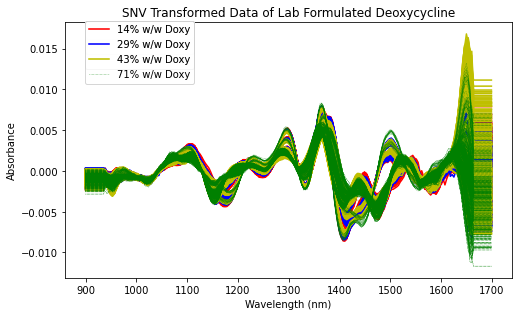

In [46]:
#Visual inspection of line plot of the SNV+SG traeted data from lab formulated Deoxycycline in capsules of varying opacities and colors when introduced to NIR spectrometer

Xsnv_sg_dece = savgol_filter(spectra_dece_snv, 21, polyorder = 2, deriv=2)

spectra_snvsg_dece = pd.DataFrame(Xsnv_sg_dece)
spectra_snvsg_dece = spectra_snvsg_dece.values[0:,0:]
spectra_T_dece = spectra_snvsg_dece.T


DE_100mg_SNVSG =spectra_T_dece[:,0:492]
DE_200mg_SNVSG =spectra_T_dece[:,493:1000]
DE_300mg_SNVSG =spectra_T_dece[:,1001:1495]
DE_500mg_SNVSG =spectra_T_dece[:,1496:2002]


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, DE_100mg_SNVSG, label='14% w/w Doxy',color='r');
ax.plot(wv, DE_200mg_SNVSG, label='29% w/w Doxy',color='b');
ax.plot(wv, DE_300mg_SNVSG, label='43% w/w Doxy',color='y');
ax.plot(wv, DE_500mg_SNVSG, label='71% w/w Doxy',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data of Lab Formulated Deoxycycline")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

Predictive Models(support vector machine regression (SVM-R) & partial Least square regression(PLS-R)) for the SNV+SG dataset

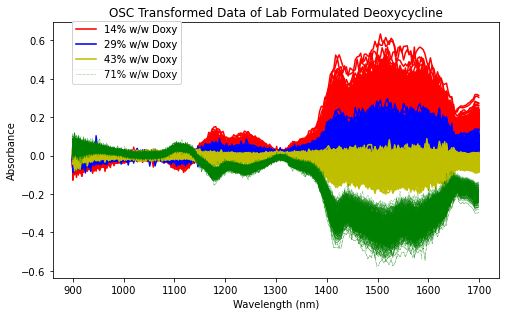

In [47]:
#Visual inspection of line plot of the Orthogonal Signal Correction(OSC) traeted data from lab formulated Isoniazid in varying capsules when introduced to NIR spectrometer



spectra_osc_dece = pd.read_csv(r'DE_Studies_mg_.csv')
target_osc_dece = pd.read_csv(r'DE_Studies_conc_percent.csv')

opls = OPLS(39)
Z_osc_dece = opls.fit_transform(spectra_osc_dece, target_osc_dece)


Z_T_osc_dece = Z_osc_dece.T

DE_100mg_OSC =Z_T_osc_dece[:,0:492]
DE_200mg_OSC =Z_T_osc_dece[:,493:1000]
DE_300mg_OSC =Z_T_osc_dece[:,1001:1495]
DE_500mg_OSC =Z_T_osc_dece[:,1496:2002]


wv = np.arange(900,1700,3.52)


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, DE_100mg_OSC, label='14% w/w Doxy',color='r');
ax.plot(wv, DE_200mg_OSC, label='29% w/w Doxy',color='b');
ax.plot(wv, DE_300mg_OSC, label='43% w/w Doxy',color='y');
ax.plot(wv, DE_500mg_OSC, label='71% w/w Doxy',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("OSC Transformed Data of Lab Formulated Deoxycycline")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

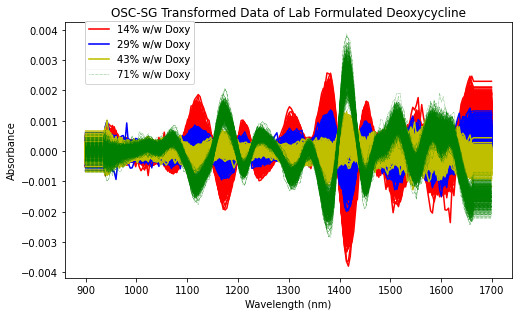

In [48]:
#Visual inspection of line plot of the OSC+SG traeted data from lab formulated Deoxycycline in varying capsules when introduced to NIR spectrometer

Xosc_sg_dece = savgol_filter(Z_osc_dece, 21, polyorder = 2, deriv=2)


Xosc_sg_T_dece = Xosc_sg_dece.T

DE_100mg_OSC_SG =Xosc_sg_T_dece[:,0:492]
DE_200mg_OSC_SG =Xosc_sg_T_dece[:,493:1000]
DE_300mg_OSC_SG =Xosc_sg_T_dece[:,1001:1495]
DE_500mg_OSC_SG =Xosc_sg_T_dece[:,1496:2002]




wv = np.arange(900,1700,3.52)



fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, DE_100mg_OSC_SG, label='14% w/w Doxy',color='r');
ax.plot(wv, DE_200mg_OSC_SG, label='29% w/w Doxy',color='b');
ax.plot(wv, DE_300mg_OSC_SG, label='43% w/w Doxy',color='y');
ax.plot(wv, DE_500mg_OSC_SG, label='71% w/w Doxy',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("OSC-SG Transformed Data of Lab Formulated Deoxycycline")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

Model development and Evaluation for SNV, SNV_SG and OSC (OPLS) Data Pretreatment

Model development and Evaluation for SNV Data Pretreatment

In [49]:
#Split the dataset (SNV) to train and test sets

X_snv_dece= pd.DataFrame(StandardScaler().fit_transform(spectra_dece_snv_T))

x_snv_dece = X_snv_dece.T

y_snv_dece = target_dece
x_train_dece,x_test_dece,y_train_dece,y_test_dece = train_test_split(x_snv_dece,y_snv_dece,random_state=0,test_size=0.25)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Predicted')

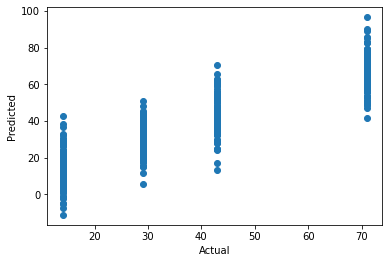

In [50]:
#the dataset (SNV) to train SVM model and test sets

#support vector machine regression model 

#SVM_regression - can be optimised
#Train SVM model

regr_dece = svm.SVR(kernel='poly',gamma = 0.90, C = 1)
regr_dece.fit(x_train_dece, y_train_dece)

#Test the model

clf_1_svr_dece = regr_dece.predict(x_test_dece)



#plot the predicted against actual

plt.scatter(y_test_dece,clf_1_svr_dece)

plt.xlabel("Actual")
plt.ylabel("Predicted")

In [51]:
#determine the correlation co-efficient (R squared) 
q_squared_dece_a1 = r2_score(y_test_dece,clf_1_svr_dece) 
q_squared_dece_a1

0.8088411529357856

In [52]:
#determine the mean square error 

mean_squared_error(y_test_dece, clf_1_svr_dece,squared=False)

9.26223799889589

In [53]:
from sklearn.metrics import r2_score

best_r2 = 0
best_ncmop = 0
for n_comp in range(1, 101):
    my_plsr = PLSRegression(n_components=n_comp, scale=True)
    my_plsr.fit(x_train_dece, y_train_dece)
    preds = my_plsr.predict(x_test_dece)
    
    r2 = r2_score(preds, y_test_dece)
    if r2 > best_r2:
        best_r2 = r2
        best_ncomp = n_comp

print(best_r2, best_ncomp)

0.9019537298190367 14


Text(0, 0.5, 'Predicted')

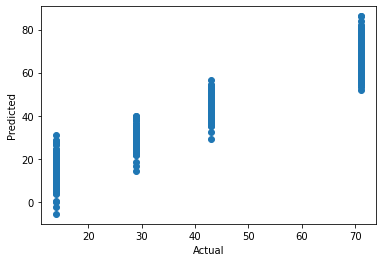

In [54]:
#the dataset (SNV) to train and test sets
#Partial Least square regression model

pls_1_dece = PLSRegression(n_components=14)

#Train PLS-R model

pls_1_dece.fit(x_train_dece, y_train_dece)

#test PLS-R model
Y_pred_snv = pls_1_dece.predict(x_test_dece)

#plot the predicted against actual
plt.scatter(y_test_dece,Y_pred_snv)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [55]:
#determine the correlation co-efficient (R squared) 
q_squared_a1 = r2_score(y_test_dece,Y_pred_snv) 
q_squared_a1

0.9084027910766571

In [56]:
#determine the root mean square error 

mean_squared_error(y_test_dece,Y_pred_snv,squared=False)

6.411503079725134

Model development and Evaluation for SNV_SG Data Pretreatment

In [57]:
#Split the dataset (SNV_SG) to train and test sets

X_dece_snvsg= pd.DataFrame(StandardScaler().fit_transform(spectra_T_dece))

x_dece_snvsg = X_dece_snvsg.T

y_dece_snvsg = pd.DataFrame(target_dece)
x_train_dece_a,x_test_dece_a,y_train_dece_a,y_test_dece_a = train_test_split(x_dece_snvsg,y_dece_snvsg,random_state=0,test_size=0.3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Predicted')

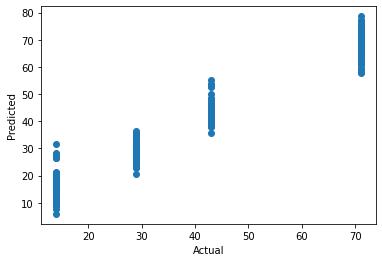

In [58]:
#the dataset (SNV+SG) to train and test sets
#support vector machine (SVM) regression 

#SVM_regression - can be optimised
#TraIn SVM model

regr_dece_snvsg = svm.SVR(kernel='poly',gamma = 0.02, C = 1)
regr_dece_snvsg.fit(x_train_dece_a, y_train_dece_a)

#Test the model

clf_1svr_dece_snvsg_a = regr_dece_snvsg.predict(x_test_dece_a)


#plot the predicted against actual

plt.scatter(y_test_dece_a,clf_1svr_dece_snvsg_a)

plt.xlabel("Actual")
plt.ylabel("Predicted")

In [59]:
#determine the correlation co-efficient (R squared) 
q_squared_dece_snvsg_a1 = r2_score(y_test_dece_a,clf_1svr_dece_snvsg_a) 
q_squared_dece_snvsg_a1

0.9720961495858871

In [60]:
#determine the root mean sqare error 

mean_squared_error(y_test_dece_a,clf_1svr_dece_snvsg_a,squared=False)

3.510407485624904

In [61]:
from sklearn.metrics import r2_score

best_r2 = 0
best_ncmop = 0
for n_comp in range(1, 101):
    my_plsr = PLSRegression(n_components=n_comp, scale=True)
    my_plsr.fit(x_train_dece_a, y_train_dece_a)
    preds = my_plsr.predict(x_test_dece_a)
    
    r2 = r2_score(preds, y_test_dece_a)
    if r2 > best_r2:
        best_r2 = r2
        best_ncomp = n_comp

print(best_r2, best_ncomp)

0.9055962104929565 13


Text(0, 0.5, 'Predicted')

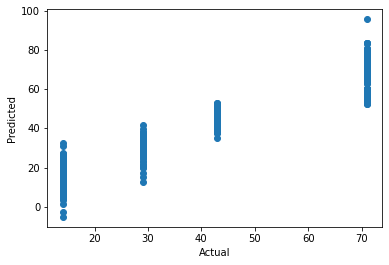

In [62]:
#the dataset (SNV+SG) to train and test sets
#Partial Least square regression (PLS-R) 

pls_1_dece_snvsg_a = PLSRegression(n_components=13)

#Train PLS-R model

pls_1_dece_snvsg_a.fit(x_train_dece_a, y_train_dece_a)

#test PLS-R model
Y_pred_dece_snvsg_a = pls_1_dece_snvsg_a.predict(x_test_dece_a)

#plot the predicted against actual
plt.scatter(y_test_dece_a,Y_pred_dece_snvsg_a)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [63]:
#determine the correlation co-efficient (R squared) 
q_squared_a = r2_score(y_test_dece_a,Y_pred_dece_snvsg_a) 
q_squared_a

0.9124906823038322

In [64]:
#determine the root mean sqare error 

mean_squared_error(y_test_dece_a,Y_pred_dece_snvsg_a,squared=False)

6.216595551041966

Model development and Evaluation for OSC Data Pretreatment - OPLS

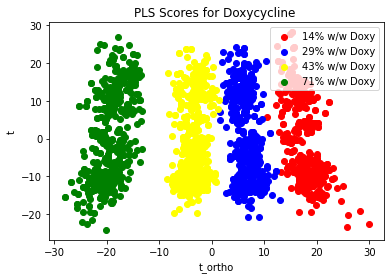

In [65]:
#the dataset (OSC) to train and test sets
spectra_dece = pd.read_csv(r'DE_Studies_mg_.csv')
target_dece = pd.read_csv(r'DE_Studies_conc_percent.csv')



opls = OPLS(39)
Z_dece = opls.fit_transform(spectra_dece, target_dece)

pls_dece = PLSRegression(1)

#PLS for Raw Data
y_preda_dece_raw = cross_val_predict(pls_dece, spectra_dece, target_dece, cv=LeaveOneOut())
q_squared = r2_score(target_dece, y_preda_dece_raw)  



#OPLS for Orthoginal Scatter Corrected Data
processed_y_opls = cross_val_predict(pls_dece, Z_dece, target_dece, cv=LeaveOneOut())
processed_q_squared = r2_score(target_dece, processed_y_opls) 


plt.figure(1)
pls.fit(Z_dece, target_dece)
df_dece = pd.DataFrame(np.column_stack([pls.x_scores_, opls.T_ortho_[:, 0]]),
                       index=spectra_dece.index, columns=['t', 't_ortho'])    


pos_df_dece = df_dece[90:492]
neg_df_dece = df_dece[493:1000]
neg2_df_dece = df_dece[1001:1495]
neg3_df_dece = df_dece[1496:2002]



plt.scatter(pos_df_dece['t'], pos_df_dece['t_ortho'], c='red', label='14% w/w Doxy')
plt.scatter(neg_df_dece['t'], neg_df_dece['t_ortho'], c='blue', label='29% w/w Doxy')
plt.scatter(neg2_df_dece['t'], neg2_df_dece['t_ortho'], c='yellow', label='43% w/w Doxy')
plt.scatter(neg3_df_dece['t'], neg3_df_dece['t_ortho'], c='green', label='71% w/w Doxy')
plt.title('PLS Scores for Doxycycline ')
plt.xlabel('t_ortho')
plt.ylabel('t')
plt.legend(loc='upper right')
plt.show()

In [66]:
 #determinr the correlation co-efficient(R-squared) for raw spectra
q_squared_234 = r2_score(target_dece, y_preda_dece_raw)
q_squared_234

0.04447215713732944

In [67]:
#determinr the correlation co-efficient(R-squared) for OSC transformed spectra
rocessed_q_squared_234 = r2_score(target_dece, processed_y_opls)
rocessed_q_squared_234

0.9649220422601469

In [68]:
#determine the root mean square error for the raw spectra

mean_squared_error(target_dece, y_preda_dece_raw,squared=False)

20.546444151201715

In [69]:
#determine the root mean square error for the OSC transformed spectra

mean_squared_error(target_dece, processed_y_opls,squared=False)

3.9366984486982015

In [70]:
# Here Orthogonal Scattering Correction based transformation was used to transform lab formulated doxycycline 


Z_osc_dosage = opls.transform(spectra_dece)

#Split the dataset to train and test set for model development

x_train_dece_dosagea,x_test_dece_dosagea,y_train_dece_dosagea,y_test_dece_dosagea = train_test_split(Z_osc_dosage, target_dece,random_state=0,test_size=0.3)

#Z_dece_DOSAGE = opls.transform(spectra_dece_dosage)

#Develop the SVM_R model

regr_dece_osc_dosage = svm.SVR(kernel='rbf',gamma = 5, C = 2)

#Train SVM_R model

regr_dece_osc_dosage.fit(x_train_dece_dosagea, y_train_dece_dosagea)

#Build PLS_R model

pls_1_dece_dosage = PLSRegression(n_components=14)

#Train PLS-R model

pls_1_dece_dosagea = pls_1_dece_dosage.fit(x_train_dece_dosagea, y_train_dece_dosagea)



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [71]:
#Test the SVM_R model's performance using the test dataset


clf_1svr_dece_snvsg_dosagea = regr_dece_osc_dosage.predict(x_test_dece_dosagea)

#clf_1svr_dece_snvsg_dosagea

In [72]:
#Test the PLS_R model's performance using the test dataset


pls_1_dece_dosa =pls_1_dece_dosagea.predict(x_test_dece_dosagea)

#pls_1_dece_dosa

In [73]:
#Compare the actual label of the test dataset samples against the predicted by SVM_R model on dataframe and save the data using csv format as svmdosa_

y_test_dece_dosagead= y_test_dece_dosagea.iloc[:,0]


svm_dosa = pd.DataFrame({'Actual':y_test_dece_dosagead, 'Predicted':clf_1svr_dece_snvsg_dosagea})

svm_dosa.to_csv('svmdosa_')

In [74]:
#determine the correlation co-efficient(R-squared) for OSC transformed spectra - SVM_R
rocessed_q_squared_dece = r2_score(y_test_dece_dosagead, clf_1svr_dece_snvsg_dosagea)
rocessed_q_squared_dece

0.9866931810556739

In [75]:
#determine the root mean square error for the OSC transformed spectra

mean_squared_error(y_test_dece_dosagead, clf_1svr_dece_snvsg_dosagea,squared=False)

2.4241672981915183

In [76]:
#Compare the actual label of the test dataset samples against the predicted by OPLS_R model on dataframe and save the data using csv format as plsdosa_

y_test_dece_dosagead =  y_test_dece_dosagea.iloc[:,0]

pls_1_dece_dosa_1 = pd.DataFrame(pls_1_dece_dosa)
pls_1_dece_dosa_1a = pls_1_dece_dosa_1.iloc[:,0]

pls_1_dosab = pd.DataFrame({'reall':y_test_dece_dosagead, 'predicted':pls_1_dece_dosa_1a})

pls_1_dosab.to_csv('plsdosa_')

In [77]:
#determinr the correlation co-efficient(R-squared) for OSC transformed spectra - pls_r (OPLS)
rocessed_q_squared_dece_ = r2_score(y_test_dece_dosagead, pls_1_dece_dosa_1a)
rocessed_q_squared_dece_

0.958569026838915

In [78]:
#determine the root mean square error for the OSC transformed spectra - pls_r (OPLS)

mean_squared_error(y_test_dece_dosagead, pls_1_dece_dosa_1a,squared=False)

4.277480433842402

In [81]:
#Import spectra data of branded doxycycline : Branded_doxy_qty

#the dataset (OSC) to train and test sets
spectra_doxy = pd.read_csv(r'Branded_doxy_qty.csv')
target_doxy_spectra = pd.read_csv(r'Branded_doxy.csv')

Branded_dosage_osc = opls.transform(target_doxy_spectra)

In [82]:
#Test the SVM_R model's performance using the test dataset


y_OSC_svr__doxy = regr_dece_osc_dosage.predict(Branded_dosage_osc)

#y_OSC_svr__doxy

In [83]:
#Compare the actual label of the test dataset samples against the predicted by SVM_R model on dataframe and save the data using csv format as svmdosa_

y_spectra_doxy= spectra_doxy.iloc[:,0]


svm_doXY = pd.DataFrame({'Actual':y_spectra_doxy, 'Predicted':y_OSC_svr__doxy})

svm_doXY.to_csv('svmdoxy_')

In [84]:
#Test the PLS_R model's performance using the test dataset


y_OSC_pls_doxy =pls_1_dece_dosagea.predict(Branded_dosage_osc)

#y_OSC_pls_doxy

In [ ]:
#Compare the actual label of the test dataset samples against the predicted by OPLS_R model on dataframe and save the data using csv format as plsdosa_


#pls_1_dece_dosa_1 = pd.DataFrame(pls_1_dece_dosa)
#pls_1_dece_dosa_1a = pls_1_dece_dosa_1.iloc[:,0]
#y_OSC_pls_doxy = y_OSC_pls_doxy.iloc[:,:]

#pls_doXY = pd.DataFrame({'Actual':y_spectra_doxy, 'predicted':y_OSC_pls_doxy})

#pls_doXY.to_csv('plsdoxy')

In [ ]:
#Import spectra data of branded doxycycline : Branded_2

#the dataset (OSC) to train and test sets
Brand_spectra_doxy = pd.read_csv(r'Branded_2.csv')
#target_doxy_spectra = pd.read_csv(r'Branded_doxy.csv')

Branded_dosage_osc2 = opls.transform(Brand_spectra_doxy)

In [ ]:
#Test the SVM_R model's performance using the test dataset


y_Brand_OSC_svr__doxy = regr_dece_osc_dosage.predict(Branded_dosage_osc2)

y_Brand_OSC_svr__doxy

In [ ]:
#Test the PLS_R model's performance using the test dataset


y_Brand_OSC_pls_doxy =pls_1_dece_dosagea.predict(Branded_dosage_osc2)

y_Brand_OSC_pls_doxy

In [ ]:
#Import spectra data of branded doxycycline : Branded_2

#the dataset (OSC) to train and test sets
Poor_Samples_spectra_doxy = pd.read_csv(r'Poor_Samples.csv')
#target_doxy_spectra = pd.read_csv(r'Branded_doxy.csv')

Poor_Branded_dosage_osc2 = opls.transform(Poor_Samples_spectra_doxy)

In [ ]:
#Test the SVM_R model's performance using the test dataset


y_Brand_Poor_OSC_svr__doxy = regr_dece_osc_dosage.predict(Poor_Branded_dosage_osc2)

y_Brand_Poor_OSC_svr__doxy